In [3]:
import json

path = 'data/info_15_0.txt'

# Load from a file
with open(path, 'r', encoding='utf-8') as f:
    loaded_list_of_dicts = json.load(f)


In [9]:
path = 'data/selection_15.json'

def load_fo_json(file):
    """Load data from json file"""
    with open(file, "r") as f:
        data = json.load(f)
        prompt_data = data["prompts_list"]
    
    f1_ult = []
    f2_ult = []
    output_ult = []

    for prompt in prompt_data:
        f1s = []
        f2s = []
        outputs = []
        for i in range(len(prompt)):
            f1s.append(prompt[i].split()[0])
            f2s.append(prompt[i].split()[1])
            outputs.append(prompt[i].split()[3])
        f1_ult.append(set(f1s))
        f2_ult.append(set(f2s))
        output_ult.append(set(outputs))

    return f1_ult, f2_ult, output_ult

f1_ult, f2_ult, output_ult = load_fo_json(path)

In [5]:
loaded_list_of_dicts[0].keys()

dict_keys(['w1_air', 'w2_Ġtrain', 'w3_Ġ->', 'w4_Ġwatch', 'w5_Ċ', 'w6_Ġwater', 'w7_Ġtrain', 'w8_Ġ->', 'w9_Ġwatch', 'w10_Ċ', 'w11_Ġair', 'w12_Ġbike', 'w13_Ġ->', 'w14_Ġpants', 'w15_Ċ', 'w16_Ġwater', 'w17_Ġcar', 'w18_Ġ->', 'w19_Ġshirt', 'w20_Ċ', 'w21_Ġearth', 'w22_Ġbike', 'w23_Ġ->', 'w24_Ġpants', 'w25_Ċ', 'w26_Ġair', 'w27_Ġbus', 'w28_Ġ->', 'w29_Ġwatch', 'w30_Ċ', 'w31_Ġfire', 'w32_Ġtrain', 'w33_Ġ->', 'w34_Ġwatch', 'w35_Ċ', 'w36_Ġfire', 'w37_Ġbike', 'w38_Ġ->', 'w39_Ġpants', 'w40_Ċ', 'w41_Ġwater', 'w42_Ġbike', 'w43_Ġ->', 'w44_Ġpants', 'w45_Ċ', 'w46_Ġair', 'w47_Ġcar', 'w48_Ġ->', 'w49_Ġwatch', 'w50_Ċ', 'w51_Ġearth', 'w52_Ġtrain', 'w53_Ġ->', 'w54_Ġwatch', 'w55_Ċ', 'w56_Ġearth', 'w57_Ġbike', 'w58_Ġ->', 'w59_Ġpants', 'w60_Ċ', 'w61_Ġfire', 'w62_Ġcar', 'w63_Ġ->', 'w64_Ġshirt', 'w65_Ċ', 'w66_Ġfire', 'w67_Ġbike', 'w68_Ġ->', 'w69_Ġpants', 'w70_Ċ', 'w71_Ġearth', 'w72_Ġbike', 'w73_Ġ->', 'w74_Ġhat', 'w75_Ċ', 'w76_Ġair', 'w77_Ġcar', 'w78_Ġ->', 'w79_Ġshirt', 'w80_Ċ', 'w81_Ġearth', 'w82_Ġbus', 'w83_Ġ->', 'w8

In [70]:
idx_c = 0
layer = 0
f1s = f1_ult[idx_c]
f2s = f2_ult[idx_c]
outputs = output_ult[idx_c]

keys_dict_list = []
for layer in range(len(loaded_list_of_dicts)):
    keys = loaded_list_of_dicts[layer].keys()

    keys_dict = {
        'current_f1': [],
        'current_f2': [],
        'current_output': [],
        'previous_f1': [],
        'previous_f2': [],
        'previous_output': [],
    }

    f1all = []
    f2all = []
    output_ult = []
    for key in keys:
        if key == 'w9_Ġwatch':
            break

        if 'Ġwatch' in key:
            output_ult.append(key)
        for f in f1s:
            if f in key:
                f1all.append(key)
            continue
        for f in f2s:
            if f in key:
                f2all.append(key)
            continue
                
    keys_dict['current_f1'].append(f1all[-1])
    keys_dict['current_f2'].append(f2all[-1])
    keys_dict['previous_f1'].extend(f1all[:-1])
    keys_dict['previous_f2'].extend(f2all[:-1])
    keys_dict['previous_output'].extend(output_ult)

    for k, v in keys_dict.items():
        data = []
        for d in v:
            idx = list(keys).index(d)
            data.append(loaded_list_of_dicts[layer]['w9_Ġwatch'][idx])
        keys_dict[k] = data

    keys_dict['current_output'] = loaded_list_of_dicts[layer]['w9_Ġwatch'][-1]
    keys_dict_list.append(keys_dict)


/tmp/slurm-phu.hoang-41539/ipykernel_858178/3903602891.py:52: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.relplot(


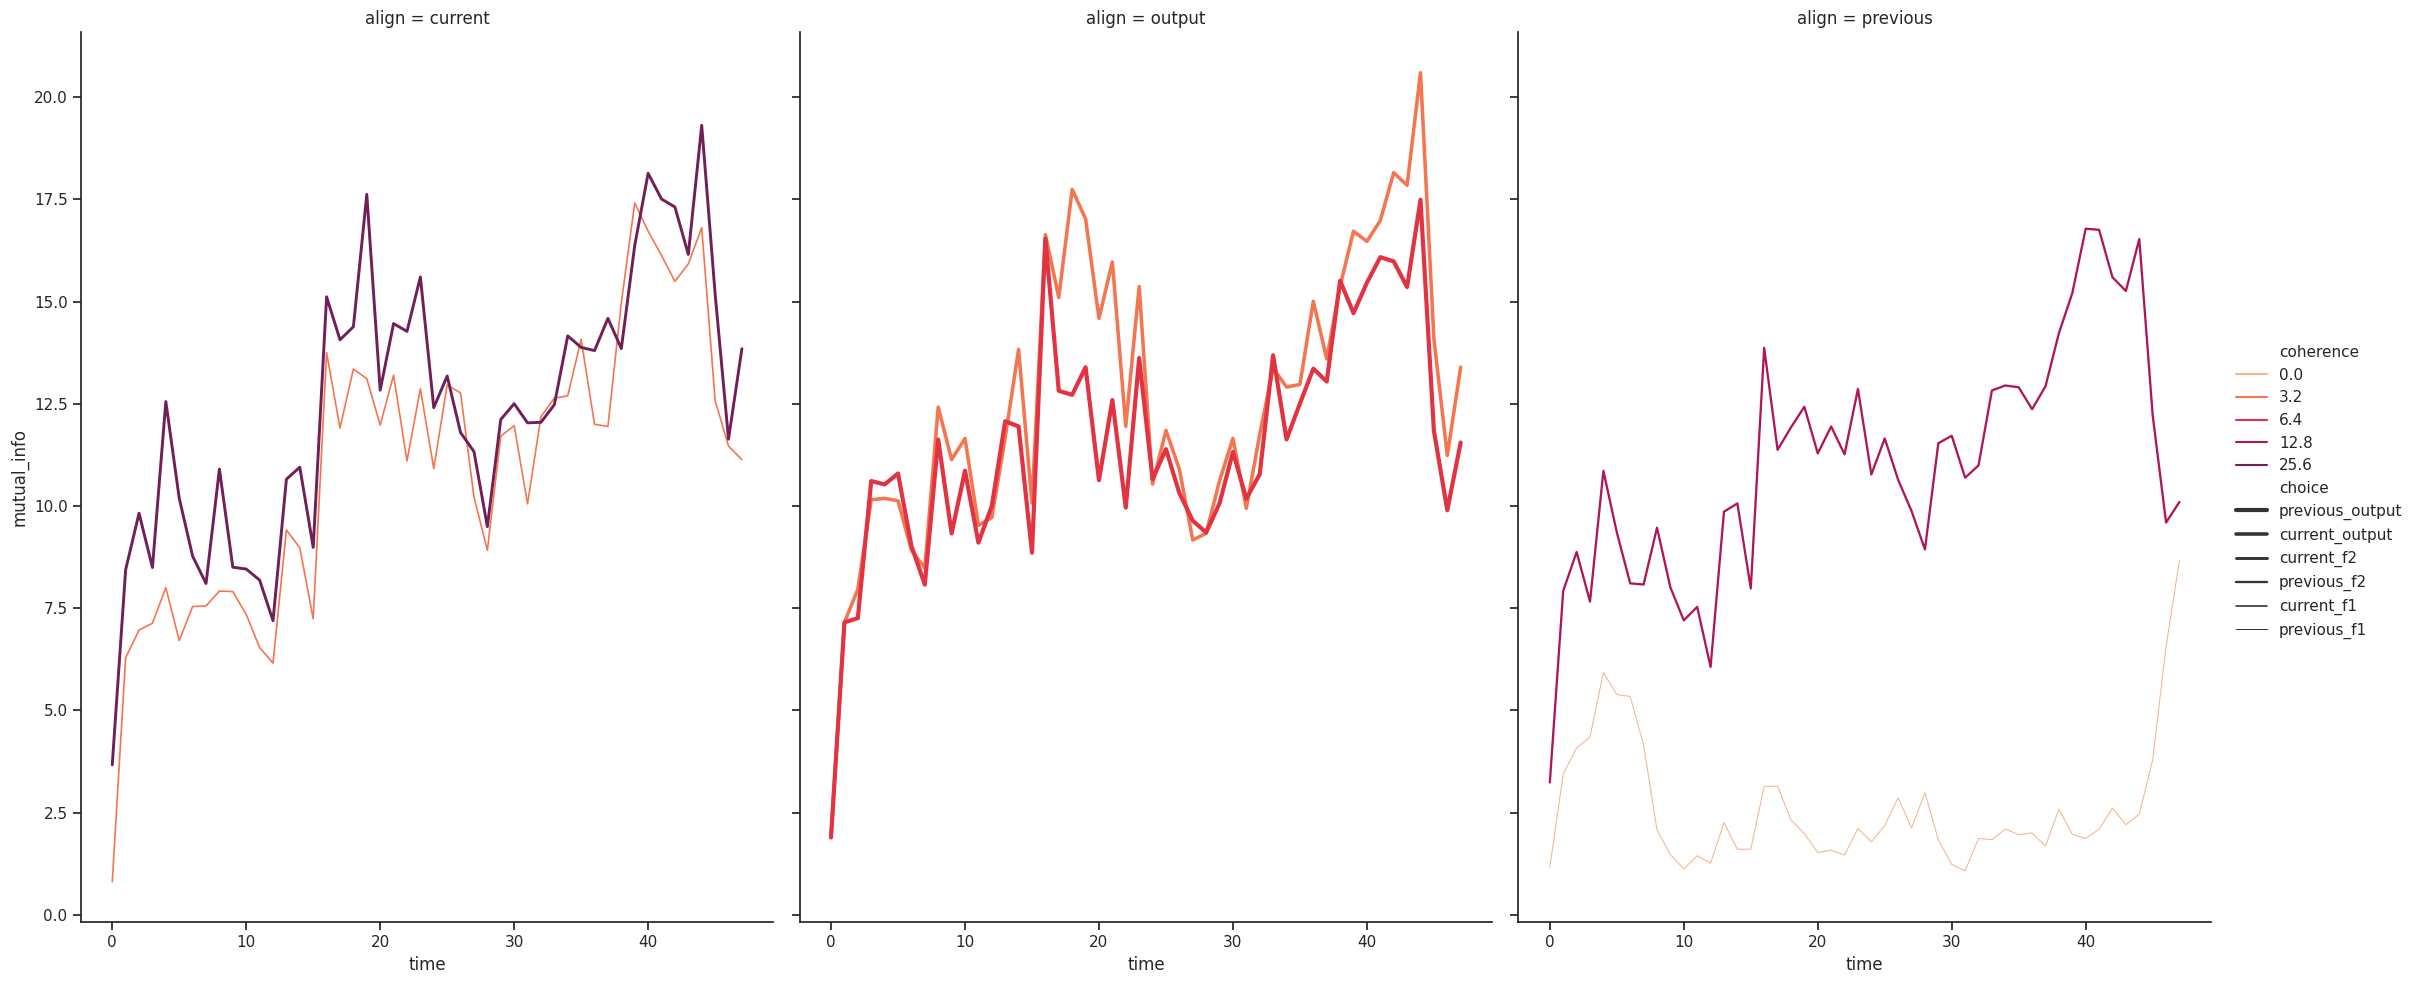

In [71]:
import pandas as pd

# Example list of dictionaries
data = keys_dict_list

# Initialize a list to store the reformatted data
reformatted_data = []

# Iterate over the data
for idx, entry in enumerate(data):
    for key, value in entry.items():
        # Determine coherence based on the key
        if key == "current_f2":
            coherence = 25.6
            align = "current"
        if key == "previous_f2":
            coherence = 12.8
            align = "previous"
        if key == "previous_output":
            coherence = 6.4
            align = "output"
        if key == "current_output":
            coherence = 3.2
            align = "output"
        if key == "current_f1":
            coherence = 3.2
            align = "current"
        if key == "previous_f1":
            coherence = 0.0
            align = "previous"
        
        # Store the data in the desired format
        reformatted_data.append({
            "align": align,
            "choice": key,
            "time": idx,
            "coherence": coherence,
            "mutual_info": value[0] if isinstance(value, list) else value
        })

# Convert the list of dicts to a DataFrame
df = pd.DataFrame(reformatted_data)

import seaborn as sns
sns.set_theme(style="ticks")


# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=df,
    x="time", y="mutual_info",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["previous_output", "current_output", "current_f2", "previous_f2", "current_f1", "previous_f1"], palette=palette,
    height=10, aspect=.75, facet_kws=dict(sharex=False),
)

In [40]:
keys_dict_list[:3]

[{'current_f1': [0.8099667800665191],
  'current_f2': [3.670525064181891],
  'previous_f1': [1.1615490992164679],
  'previous_f2': [3.240676953345309],
  'previous_output': [1.8933342206800616]},
 {'current_f1': [6.287273881530897],
  'current_f2': [8.443034628599852],
  'previous_f1': [3.450215693096556],
  'previous_f2': [7.923591429945901],
  'previous_output': [7.1525972956383725]},
 {'current_f1': [6.967101046963062],
  'current_f2': [9.823565866279234],
  'previous_f1': [4.080609477336576],
  'previous_f2': [8.875310995578776],
  'previous_output': [7.2591507539235645]}]

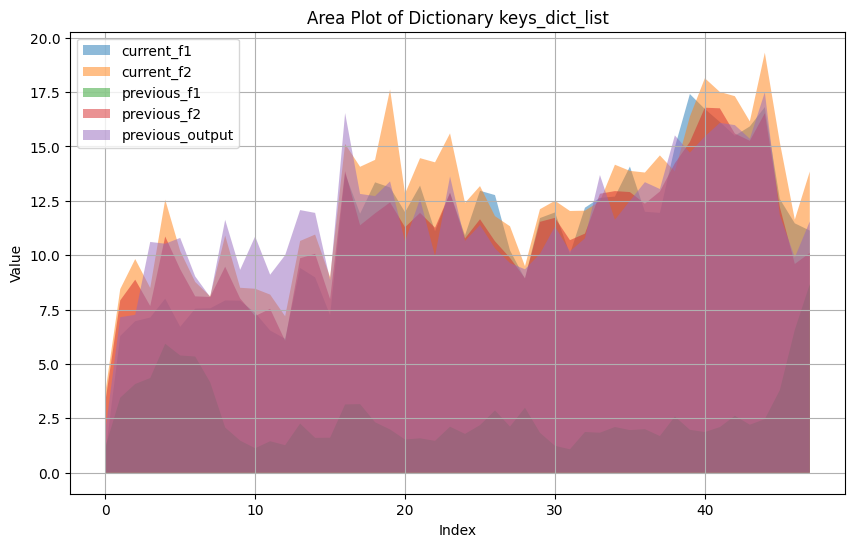

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Convert list of dicts into a structure suitable for plotting
keys = keys_dict_list[0].keys()
values = {key: [] for key in keys}

# Extract values from dictionaries and organize them into lists
for idx, entry in enumerate(keys_dict_list):
    for key, value in entry.items():
        if isinstance(value, list):
            values[key].append(value[0])  # Unwrap list
        else:
            values[key].append(value)

# Plot the keys_dict_list as area plots
x = range(len(keys_dict_list))
plt.figure(figsize=(10, 6))

for key, value in values.items():
    plt.fill_between(x, value, label=key, alpha=0.5)

# Adding labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Area Plot of Dictionary keys_dict_list")
plt.legend(loc="best")

# Show the plot
plt.grid(True)
plt.show()


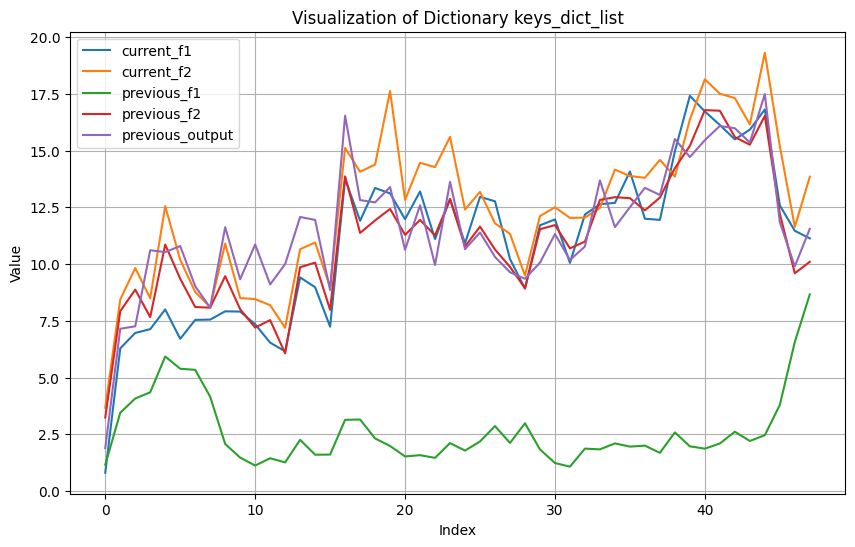

In [38]:
import matplotlib.pyplot as plt


# Convert list of dicts into a structure suitable for plotting
keys = keys_dict_list[0].keys()
values = {key: [] for key in keys}

# Extract values from dictionaries and organize them into lists
for idx, entry in enumerate(keys_dict_list):
    for key, value in entry.items():
        if isinstance(value, list):
            values[key].append(value[0])  # Unwrap list
        else:
            values[key].append(value)

# Plot the keys_dict_list
plt.figure(figsize=(10, 6))
for key, value in values.items():
    plt.plot(range(len(keys_dict_list)), value, label=key)

# Adding labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Visualization of Dictionary keys_dict_list")
plt.legend(loc="best")

# Show the plot
plt.grid(True)
plt.show()
